In [73]:
import gensim
import numpy as np
import spacy
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [15]:
# since we're working in python 2.7 in this tutorial, we need to make sure to clean our data to make it unicode consistent
def clean(text):
    return unicode(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [16]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [22]:
nlp = spacy.load("en_core_web_sm")

In [26]:
my_stop_words = [u'say',u'\'s',u'Mr',u'be',u'said',u'says',u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [28]:
doc = nlp((text))

In [29]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [62]:
texts , article = [] , []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text == '\n':
        texts.append(article)
        article = []

In [63]:
bigram = gensim.models.Phrases(texts)

In [64]:
texts = [bigram[line] for line in texts]

In [65]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [66]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 3),
  (54, 1),
  (55, 1),
  (56, 5),
  (57, 2),
  (58, 1),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [67]:
#lSI model

lsimodel = LsiModel(corpus=corpus,num_topics=10,id2word=dictionary)
lsimodel.show_topics()

[(0,
  '-0.239*"israeli" + -0.214*"Arafat" + -0.196*"palestinian" + -0.175*"force" + -0.159*"kill" + -0.159*"official" + -0.151*"attack" + -0.141*"people" + -0.118*"day" + -0.117*"Israel"'),
 (1,
  '0.312*"israeli" + 0.300*"Arafat" + 0.269*"palestinian" + -0.162*"Afghanistan" + 0.161*"Sharon" + -0.159*"Australia" + 0.154*"Israel" + 0.127*"Hamas" + 0.122*"West_Bank" + -0.116*"day"'),
 (2,
  '-0.261*"Afghanistan" + -0.222*"force" + -0.186*"Al_Qaeda" + -0.176*"bin_Laden" + 0.172*"fire" + -0.143*"Pakistan" + -0.140*"Taliban" + 0.140*"Sydney" + -0.135*"fighter" + -0.131*"Tora_Bora"'),
 (3,
  '-0.379*"fire" + -0.273*"area" + -0.206*"Sydney" + 0.205*"Australia" + -0.175*"firefighter" + -0.161*"north" + -0.153*"wind" + -0.138*"Wales" + -0.138*"New_South" + -0.131*"south"'),
 (4,
  '0.276*"company" + 0.208*"Qantas" + 0.180*"union" + -0.168*"test" + 0.149*"worker" + -0.140*"win" + -0.137*"match" + -0.132*"South_Africa" + -0.120*"wicket" + 0.116*"cent"'),
 (5,
  '-0.425*"metre" + -0.338*"win" + -

In [68]:
#Hdp model

hdpmodel = HdpModel(corpus = corpus,id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.003*storm + 0.003*people + 0.003*Adventure_World + 0.003*company + 0.003*canyone + 0.002*tree + 0.002*director + 0.002*Australia + 0.002*Friedli + 0.002*day + 0.002*hit + 0.002*charge + 0.002*Australians + 0.002*damage + 0.002*think + 0.002*know + 0.002*court + 0.002*death + 0.002*guide + 0.002*trip'),
 (1,
  '0.003*airport + 0.003*Taliban + 0.002*opposition + 0.002*kill + 0.002*day + 0.002*help + 0.002*Government + 0.002*cent + 0.002*call + 0.002*Kandahar + 0.002*night + 0.002*yesterday + 0.002*Afghanistan + 0.002*man + 0.002*area + 0.002*end + 0.002*agreement + 0.002*afghan + 0.001*Lee + 0.001*leave'),
 (2,
  '0.006*israeli + 0.004*Arafat + 0.003*Sharon + 0.003*match + 0.002*ask + 0.002*West_Bank + 0.002*Israelis + 0.002*palestinian + 0.002*military + 0.002*hour + 0.002*team + 0.002*play + 0.002*Rafter + 0.002*attack + 0.002*official + 0.002*force + 0.002*kill + 0.002*town + 0.002*Palestinian_Authority + 0.002*tennis'),
 (3,
  '0.003*group + 0.003*palestinian + 0.002*Govern

In [69]:
#LDA model

ldamodel = LdaModel(corpus=corpus,num_topics=10,id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.007*"year" + 0.005*"fire" + 0.005*"people" + 0.004*"area" + 0.004*"Sydney" + 0.004*"day" + 0.003*"group" + 0.003*"wind" + 0.003*"Afghanistan" + 0.003*"report"'),
 (1,
  '0.007*"man" + 0.006*"report" + 0.004*"israeli" + 0.004*"people" + 0.004*"tell" + 0.004*"palestinian" + 0.004*"attack" + 0.003*"Australia" + 0.003*"australian" + 0.003*"kill"'),
 (2,
  '0.006*"Australia" + 0.005*"group" + 0.004*"arrest" + 0.003*"report" + 0.003*"day" + 0.003*"claim" + 0.003*"year" + 0.003*"come" + 0.003*"child" + 0.003*"win"'),
 (3,
  '0.006*"Australia" + 0.004*"new" + 0.004*"people" + 0.004*"australian" + 0.003*"claim" + 0.003*"tell" + 0.003*"force" + 0.003*"United_States" + 0.003*"Afghanistan" + 0.003*"arrest"'),
 (4,
  '0.005*"force" + 0.005*"Afghanistan" + 0.004*"know" + 0.003*"year" + 0.003*"day" + 0.003*"area" + 0.003*"Australian" + 0.003*"attack" + 0.003*"report" + 0.003*"come"'),
 (5,
  '0.006*"kill" + 0.005*"israeli" + 0.004*"palestinian" + 0.004*"people" + 0.004*"Australia" + 0.003*"

In [70]:
#pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.001402  0.072764       1        1  14.437490
5      0.022218  0.009675       2        1  12.555881
1     -0.018956 -0.007020       3        1  10.918681
4      0.005747 -0.017969       4        1  10.641986
0      0.030954  0.012001       5        1   9.995035
7     -0.069480 -0.000640       6        1   9.655901
9     -0.019987  0.008669       7        1   9.031937
3     -0.009159 -0.033498       8        1   8.276213
2      0.010446 -0.031972       9        1   8.064169
8      0.046816 -0.012010      10        1   6.422705, topic_info=           Term       Freq       Total Category  logprob  loglift
684    official  68.000000   68.000000  Default  30.0000  30.0000
2389     Qantas  30.000000   30.000000  Default  29.0000  29.0000
59        force  88.000000   88.000000  Default  28.0000  28.0000
5437      virus  10.000000   10.000000  Default  27.0000  27.0000
143       group  57.000000   57.000000  Default  26.0000  26.0000
...         ...        ...         ...      ...      ...      ...
1024        man   3.863334   67.529877  Topic10  -6.1717  -0.1157
353      return   3.259692   34.010845  Topic10  -6.3416   0.4003
894      report   3.566804   67.751167  Topic10  -6.2516  -0.1988
678        kill   3.478032   65.099586  Topic10  -6.2768  -0.1841
311   Australia   3.462889  112.393509  Topic10  -6.2811  -0.7346

[802 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
645       1  0.109129            
645       2  0.109129            
645       3  0.087303            
645       4  0.109129            
645       5  0.087303            
...     ...       ...         ...
179       9  0.095062   yesterday
179      10  0.071296   yesterday
5527      9  0.615414  zimbabwean
2809      4  0.297575        zone
2809      5  0.297575        zone

[2340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 5, 1, 8, 10, 4, 3, 9])

In [75]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Anil\OneDrive\Desktop\qbe\cust_data_train.csv',encoding='iso-8859-1')
data.head()

,Product ID,Customer Age,Customer Feedback,Customer Category
0,865,44,I strongly disagree with the previous reviewer...,Promoter
1,1068,44,Bummed out.. this is super cheaply made and ve...,Detractor
2,974,67,The colors on this jacket are a murky blue wit...,Detractor
3,1104,66,I love the style the lightness and the fit ......,Detractor
4,820,32,"I am very petite (size 00, xxs) and i got the ...",Promoter


In [81]:
# Load the regular expression library
import re

# Remove punctuation
data['cf_processed'] = data['Customer Feedback'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

# Convert the titles to lowercase
data['cf_processed'] = data['cf_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data['cf_processed'].head()

0    i strongly disagree with the previous reviewer...
1    bummed out this is super cheaply made and very...
2    the colors on this jacket are a murky blue wit...
3    i love the style the lightness and the fit  bu...
4    i am very petite (size 00 xxs) and i got the s...
Name: cf_processed, dtype: object

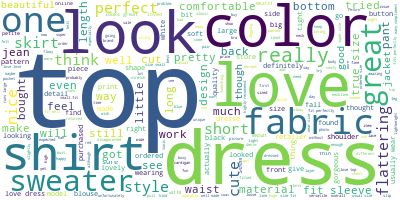

In [85]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['cf_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=100, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

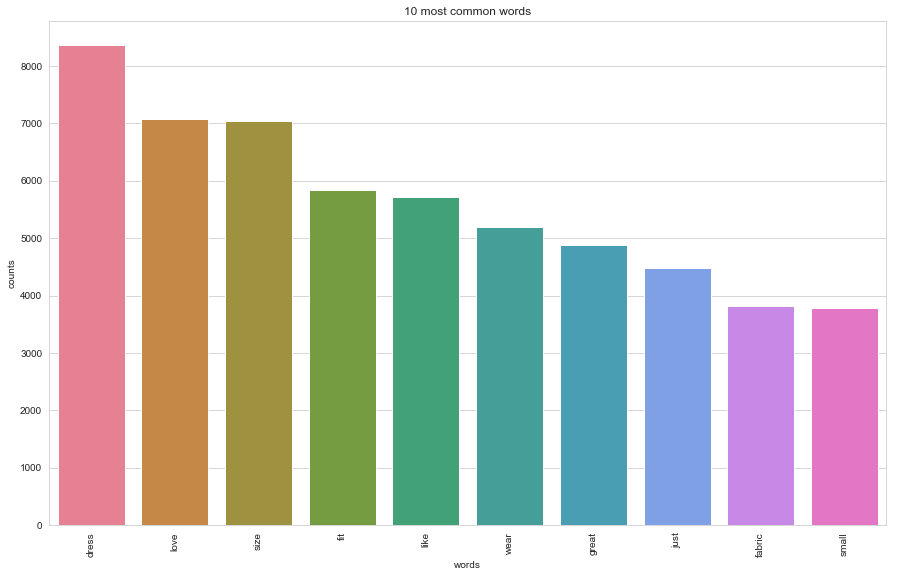

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['cf_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [87]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
like shirt wear white color sweater love bought nan fabric

Topic #1:
love great wear jeans fit perfect comfortable pants soft like

Topic #2:
color beautiful love fabric price size great like really nice

Topic #3:
size small fit ordered large xs like just store medium

Topic #4:
dress like just fit size love wear fabric flattering small


In [89]:
import pandas as pd
data1 = pd.read_csv(r'C:\Users\Anil\OneDrive\Desktop\qbe\cust_data_test.csv',encoding='iso-8859-1')

# Remove punctuation
data1['cf_processed'] = data1['Customer Feedback'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

# Convert the titles to lowercase
data1['cf_processed'] = data1['cf_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data1['cf_processed'].head()



0    this is a a great piece   i tried it on in den...
1    this shirt is beautiful and well-made the lace...
2    oh how i dread online shopping for bikinisespe...
3    i was attracted to this sweater because of it'...
4    i had been searching for an almost 50s style d...
Name: cf_processed, dtype: object

In [ ]:
count_data1 = count_vectorizer.transform(data1['cf_processed'])

In [101]:
a = lda.transform(count_data1)

In [103]:
a.shape

(4698, 5)

In [108]:
a = pd.DataFrame(a,columns=['Topic1','Topic2','Topic3','Topic4','Topic5'])

In [113]:
c = pd.concat([data1,a],axis=1)

In [123]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1)
c

,Product ID,Customer Age,Customer Feedback,Customer Category,Probabilty,...,Topic1,Topic2,Topic3,Topic4,Topic5
0,1078,52,This is a a great piece. i tried it on in de...,NaN,NaN,...,0.006392,0.582495,0.006425,0.398340,0.006349
1,829,46,This shirt is beautiful and well-made. the lac...,NaN,NaN,...,0.931975,0.017052,0.017315,0.016802,0.016856
2,394,37,Oh how i dread online shopping for bikinis...e...,NaN,NaN,...,0.125746,0.305756,0.556948,0.005811,0.005738
3,941,49,I was attracted to this sweater because of it'...,NaN,NaN,...,0.326640,0.646633,0.008975,0.008846,0.008905
4,1083,40,I had been searching for an almost 50s style d...,NaN,NaN,...,0.007266,0.007129,0.209919,0.007115,0.768571
...,...,...,...,...,...,...,...,...,...,...,...
4693,1092,47,"Ok, here is the story: i am 5'5"", 118 lb, 34c....",NaN,NaN,...,0.004852,0.004832,0.004874,0.004894,0.980550
4694,1035,39,The jeans are even better in person. great fit...,NaN,NaN,...,0.020616,0.623680,0.314912,0.020498,0.020295
4695,1093,34,I was very excited about receiving this dress....,NaN,NaN,...,0.008957,0.072795,0.363621,0.105296,0.449331
4696,819,39,This is very cute in person. i love the colors...,NaN,NaN,...,0.004982,0.320379,0.109913,0.559730,0.004996


In [104]:
data1.shape

(4698, 6)

In [107]:
pd.DataFrame?